# Ejercicio N3

Un filtro pasabajos Chebyshev se diseña para obtener una atenuación de 48 dB para frecuencias mayores a 9.6 KHz, con una atenuación máxima de 0.4 dB desde continua hasta 3.2 kHz.
- Determinar el orden del filtro y el parámetro ɛ.
- Graficar la respuesta en módulo del filtro.
- Determinar la ubicación de polos y ceros.
- Sintetizar el circuito utilizando estructuras Kerwin–Huelsman–Newcomb y simular verificando las condiciones de diseño.

In [3]:
import numpy as np

f1 = 3200
f2 = 9600
norma_w = f1

f1 = f1/norma_w
f2 = f2/norma_w

alfa_min = 48
alfa_max = 0.4

epsilon_2 = 10**(alfa_max/10)-1
epsilon = np.sqrt(epsilon_2)
n = np.ceil(np.arccosh((np.power(10, alfa_min * 0.1) - 1) / (np.power(10, alfa_max * 0.1) - 1)) / (2 * np.arccosh(f2)))

print('Epsilon: {:.4f}'.format(epsilon))
print('Epsilon al cuadrado: {:.4f}'.format(epsilon_2))
print('Orden del filtro: {:0.0f}'.format(n))

Epsilon: 0.3106
Epsilon al cuadrado: 0.0965
Orden del filtro: 4


Para orden 4, el polinomio de Chebyshev es:
$$ C_4(w)= 8w^4-8w^2+1 $$
La transferencia del filtro queda entonces:
$$ \lvert T(jw)\rvert^2=\frac{1}{1+\varepsilon^2(8w^4-8w^2+1)^2}$$

$$ \lvert T(jw)\rvert^2=\frac{1}{64\varepsilon^2w^8-128\varepsilon^2w^6+80\varepsilon^2w^4-16\varepsilon^2w^2+\varepsilon^2+1}$$

Haciendo el reemplazo: $T(s).T(-s)=\lvert T(jw)\rvert^2\rfloor_{w=\frac{s}{j}}$

$$ T(s).T(-s)=\frac{1}{64\varepsilon^2s^8+128\varepsilon^2s^6+80\varepsilon^2s^4+16\varepsilon^2s^2+\varepsilon^2+1}$$

$$ T(s).T(-s)=\frac{\frac{1}{64\varepsilon^2}}{s^8+2s^6+1,25s^4+0,25s^2+\frac{\varepsilon^2+1}{64\varepsilon^2}}$$

A continuación, grafico la transferencia y la ubicación de los polos y ceros:

(2, <AxesSubplot:xlabel='$\\sigma$', ylabel='j$\\omega$'>)

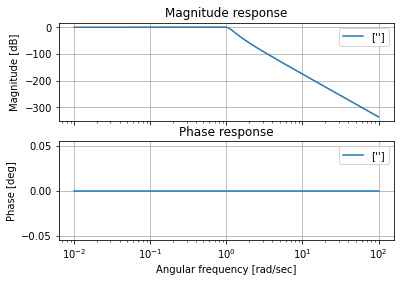

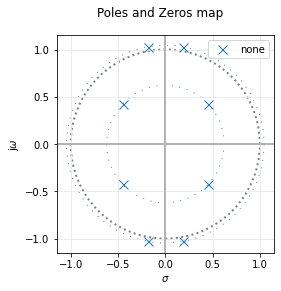

In [6]:
from splane import pzmap, bodePlot
from scipy.signal import TransferFunction
import matplotlib.pyplot as plt


my_tf = TransferFunction( [1/(64*epsilon_2)], [1, 0, 2, 0, 1.25, 0, 0.25, 0, (epsilon_2+1)/(64*epsilon_2)] )

bodePlot(my_tf)

pzmap(my_tf)

Para sintetizar el circuito en Secciones de Segundo Orden, debo redefinir la transferencia. Para esto, obtengo sus polos:

In [10]:
pol = [1, 0, 2, 0, 1.25, 0, 0.25, 0, (epsilon_2+1)/(64*epsilon_2)]
np.set_printoptions(precision=3)
print(np.roots(pol))

[-0.187+1.028j -0.187-1.028j  0.187+1.028j  0.187-1.028j -0.452+0.426j
 -0.452-0.426j  0.452+0.426j  0.452-0.426j]


Me quedo con las raíces correspondientes a $T(s)$

$$ T(s)=\frac{\frac{1}{8\varepsilon}}{s^2+0,3743.s+0,03705}\frac{\frac{1}{8\varepsilon}}{s^2+0,90368.s+0,03705}$$

Los parámetros de las transferencias son:

In [12]:
wo1_2 = 0.03705
wo1_q = 0.3743

wo1 = np.sqrt(wo1_2)
q1 = wo1/wo1_q
k1 = (wo1/q1)*(8*epsilon)

print('Parametros del 1er filtro:')
print('Wo1={:.4f} - Q1={:.4f} - k1={:.4f}'.format(wo1, q1, k1))

Parametros del 1er filtro:
Wo1=0.1925 - Q1=0.5142 - k1=0.9301


In [13]:
wo2_2 = 0.03705
wo2_q = 0.90368

wo2 = np.sqrt(wo2_2)
q2 = wo2/wo2_q
k2 = (wo2/q2)*(8*epsilon)

print('Parametros del 2do filtro:')
print('Wo2={:.4f} - Q2={:.4f} - k2={:.4f}'.format(wo2, q2, k2))

Parametros del 2do filtro:
Wo2=0.1925 - Q2=0.2130 - k2=2.2455


Diseñamos los filtros de acuerdo a las condiciones de diseño establecidas en el siguiente documento:

In [19]:
from IPython.display import IFrame
IFrame("./pdf/MT-223.pdf", width=1000, height=500)

In [21]:
r1_1 = 10e3

alp = k1
ahp = 1

r2_1 = alp*r1_1
r3_1 = ahp*r1_1

c_1 = 1e-9
r_1 = ((2*np.pi*norma_w*wo1)/c_1)*np.sqrt(ahp/alp)

r7_1 = 10e3
r6_1 = np.sqrt(r2_1*r3_1)*q1*(1/((1/r1_1)*(1/r2_1)*(1/r3_1)))

print('Los valores de los componentes son:')
print('R1={:.2e} ohm - R2={:.2e} ohm - R3={:.2e} ohm - R4={:.2e} ohm'.format(r1_1, r2_1, r3_1, r_1))
print('R5={:.2e} ohm - R6={:.2e} ohm - R7={:.2e} ohm'.format(r_1, r6_1, r7_1))
print('C1={:.2e} F - C2={:.2e} F'.format(c_1, c_1))

Los valores de los componentes son:
R1=1.00e+04 ohm - R2=9.30e+03 ohm - R3=1.00e+04 ohm - R4=4.01e+12 ohm
R5=4.01e+12 ohm - R6=4.61e+15 ohm - R7=1.00e+04 ohm
C1=1.00e-09 F - C2=1.00e-09 F
